In [1]:
# Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике,
# чтобы на ранней стадии выявлять студентов, находящихся в группе риска.
# Цель проекта – подготовить данные для построения модели, которая предсказывала бы результаты госэкзамена
# по математике для каждого ученика школы.
# Этапы работы над проектом:
# - подготовка и проверка правильности загрузки данных
# - проверка и устранение выбросов и пропусков в признаках
# - проведение корреляционного анализа, построение boxplot и проведение теста Стьюдента
# для определения признаков влияющих на целевую переменную Score.

'Этапы работы над проектом:\n- подготовка и проверка правильности загрузки данных\n- проверка и устранение выбросов и пропусков в признаках\n- проведение корреляционного анализа, построение boxplot и проведение теста Стьюдента для определения признаков влияющих на целевую переменную Score.\n'

In [2]:
# загрузка модулей
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind

%matplotlib inline
warnings.simplefilter('ignore')

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

# загрузка датасета
students = pd.read_csv('stud_math.xls')

In [3]:
# посмотрим на данные и описание датасета
display(students.head(10))
students.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [4]:
# В датасете содержится 395 строк (учеников) и 30 признаков, в т.ч. целевой признак - score - оценка по математике;
# из них 13 признаков числовых, 17 строковых.

In [5]:
# сделаем названия столбцов с маленькой буквы для удобства и переименуем столбец "studytime, granular"
columns = students.columns.values

for i in range(len(columns)):
    columns[i] = str(columns[i]).lower()

students.rename(
    columns={'studytime, granular': 'studytime_granular'}, inplace=True)

students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [6]:
students.describe(include=['object'])

,school,sex,address,famsize,pstatus,mjob,fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,378,368,350,376,359,378,364,386,356,355,381,379,375,361,364
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,295,261,314,133,197,137,250,335,219,200,195,300,356,305,240


In [7]:
students.describe()

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


<AxesSubplot:>

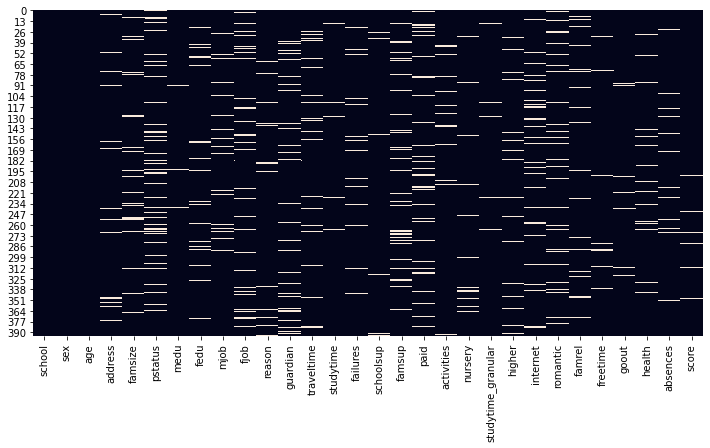

In [8]:
#Оценим визуально пропуски в данных
fig = plt.figure(figsize=(12, 6))
sns.heatmap(students.isnull(), cbar=False)

In [9]:
# Первичный анализ данных показал, что признаки можно разделить на следующие типы:

# Числовые - 3: age, absences, score

# Номинативные - бинарные - 13 шт.: school, sex, address, famsize, pstatus, schoolsup, famsup, paid,
# activities, nursery, higher, internet, romantic.

# Номинативные - оценочные - 14 шт.: medu, fedu, mjob, fjob, reason, guardian, traveltime, studytime,
# studytime_granular, failures, famrel, freetime, goout, health.

# Только 3 признака не содержат пропусков (school, sex, age).

In [10]:
# Напишем функцию для рандомного заполнения пропусков в номинативных бинарных признаках
# для сохранения реалистичности данных в которых значение переменной yes/no
np.random.seed(1)


def nan_to_values(column):
    nan_index_list = students[pd.isna(students[column])].index
    for index in nan_index_list:
        students.iat[index, students.columns.get_loc(
            column)] = np.random.choice(['yes', 'no'], 1)[0]


# Функция для рандомного заполнения пропусков в номинативных оценочных признаках
# для сохранения реалистичности данных

def nan_to_estimation(column):
    nan_index_list = students[pd.isna(students[column])].index
    for index in nan_index_list:
        students.iat[index, students.columns.get_loc(column)] = np.random.choice(
            ['1.0', '2.0', '3.0', '4.0', '5.0'], 1)[0]


# Функция для первичного анализа колонки

def static_columns(col):
    print('Пропуски:', col.isnull().sum())
    display(col.describe())
    display(col.value_counts())
    sns.countplot(col)

<AxesSubplot:>

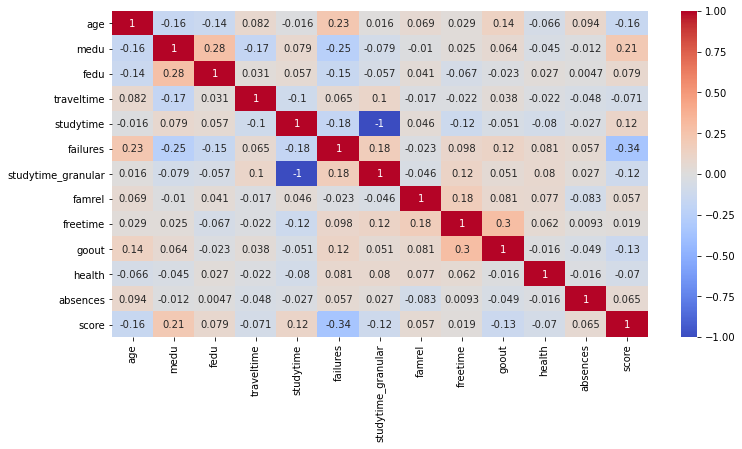

In [11]:
# Оценим корреляцию по тепловой карте
fig = plt.figure(figsize=(12, 6))
sns.heatmap(students.corr(), annot=True, cmap='coolwarm')

In [12]:
# Столбец 'studytime_granular' в описании задания не указан.
# По тепловой карте видим обратную корреляцию со столбцом 'studytime':
display(pd.DataFrame(students.studytime.value_counts()),
        pd.DataFrame(students.studytime_granular.value_counts()))

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


,studytime_granular
-6.0,194
-3.0,103
-9.0,64
-12.0,27


In [13]:
# Все значения одинаково распредлены на 4 категории.
# Используем для наглядности матрицу корреляций:
students[['studytime', 'studytime_granular']].corr()

,studytime,studytime_granular
studytime,1.0,-1.0
studytime_granular,-1.0,1.0


In [14]:
# 100% обратная корреляция между столбцами studytime и studytime_granular
# удаляем столбец studytime_granular
students.drop(['studytime_granular'], inplace=True, axis=1)

Пропуски: 0


count     395
unique      2
top        GP
freq      349
Name: school, dtype: object

GP    349
MS     46
Name: school, dtype: int64

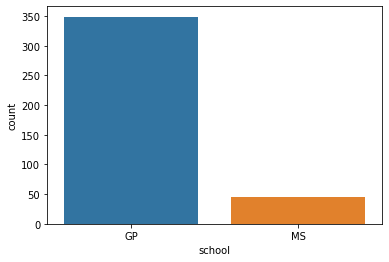

In [15]:
# Теперь рассмотрим все остальные признаки по порядку.
# school — аббревиатура школы, в которой учится ученик
# номинативный бинарный признак, т.к. имеется всего два значения, пропусков нет
static_columns(students.school)

Пропуски: 0


count     395
unique      2
top         F
freq      208
Name: sex, dtype: object

F    208
M    187
Name: sex, dtype: int64

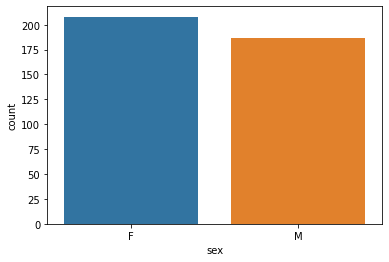

In [16]:
# sex — пол ученика ('F' - женский, 'M' - мужской)
# номинативный бинарный признак, т.к. имеется всего два значения, пропусков нет
static_columns(students.sex)

Пропуски: 0


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

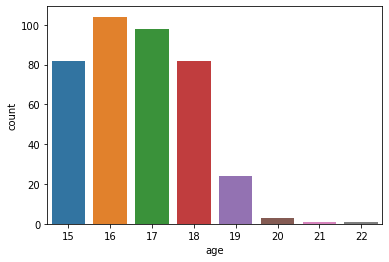

In [17]:
# age - возраст ученика (от 15 до 22)
# Числовой признак, пропусков в данном столбце нет.
# Выбросов нет, т.к. все значения попадают в диапозон возрастов по условию иследования.
static_columns(students.age)

Пропуски: 17


count     378
unique      2
top         U
freq      295
Name: address, dtype: object

U    295
R     83
Name: address, dtype: int64

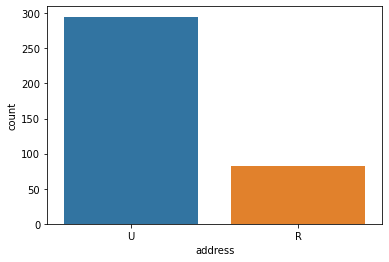

In [18]:
# address — тип адреса ученика ('U' - городской, 'R' - за городом)
# номинативный бинарный признак, т.к. имеется всего два значения
static_columns(students.address)

In [19]:
# так же в address имеется 17 пропусков, напишем функцию для рандомного проставления значений
# для сохранения реалистичности

def nan_to_address(column):
    nan_index_list = students[pd.isna(students[column])].index
    for index in nan_index_list:
        students.iat[index, students.columns.get_loc(
            column)] = np.random.choice(['U', 'R'], 1)[0]

# подставляем функцию, смотрим как распределились значения


nan_to_address('address')
display(students.address.value_counts(dropna=False))

U    302
R     93
Name: address, dtype: int64

Пропуски: 27


count     368
unique      2
top       GT3
freq      261
Name: famsize, dtype: object

GT3    261
LE3    107
Name: famsize, dtype: int64

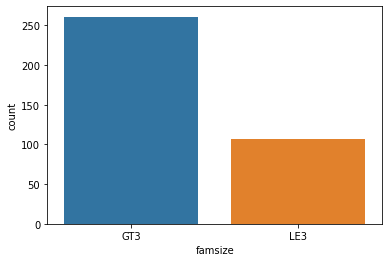

In [20]:
# famsize - размер семьи('LE3' <= 3, 'GT3' >3)
# номинативный бинарный признак, т.к. имеется всего два значения
static_columns(students.famsize)

In [21]:
# так же в famsize имеется 27 пропусков, напишем функцию для рандомного проставления значений
# для сохранения реалистичности

def nan_to_famsize(column):
    nan_index_list = students[pd.isna(students[column])].index
    for index in nan_index_list:
        students.iat[index, students.columns.get_loc(
            column)] = np.random.choice(['GT3', 'LE3'], 1)[0]


# подставляем функцию, смотрим как распределились значения

nan_to_famsize('famsize')
display(students.famsize.value_counts(dropna=False))

GT3    275
LE3    120
Name: famsize, dtype: int64

Пропуски: 45


count     350
unique      2
top         T
freq      314
Name: pstatus, dtype: object

T    314
A     36
Name: pstatus, dtype: int64

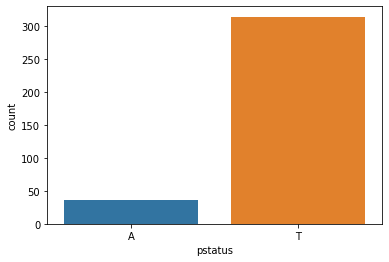

In [22]:
# pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
# номинативный бинарный признак, т.к. имеется всего два значения
static_columns(students.pstatus)

In [23]:
# так же в pstatus имеется 45 пропусков, напишем функцию для рандомного проставления значений
# для сохранения реалистичности


def nan_to_pstatus(column):
    nan_index_list = students[pd.isna(students[column])].index
    for index in nan_index_list:
        students.iat[index, students.columns.get_loc(
            column)] = np.random.choice(['A', 'T'], 1)[0]


# подставляем функцию, смотрим как распределились значения

nan_to_pstatus('pstatus')
display(students.pstatus.value_counts(dropna=False))

T    339
A     56
Name: pstatus, dtype: int64

Пропуски: 3


count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: medu, dtype: int64

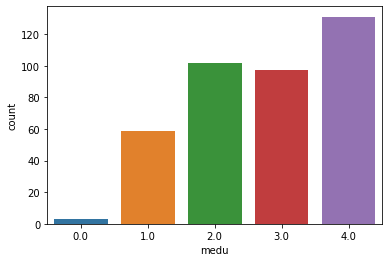

In [24]:
# medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
# номинативный оценочный признак, имеется 3 пропуска
static_columns(students.medu)

Пропуски: 24


count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: fedu, dtype: float64

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: fedu, dtype: int64

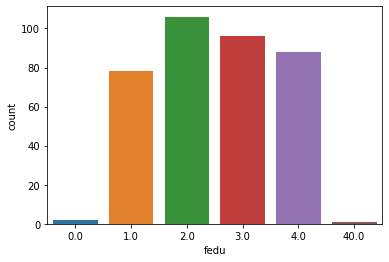

In [25]:
# fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
# номинативный оценочный признак
static_columns(students.fedu)

In [26]:
# имеется 24 пропуска и один выброс (значение не входящее в нашу классификацию)
# скорее всего опечатка, имелось ввиду 4.0
# исправляем ошибку ввода
students.loc[students.fedu == 40.0, 'fedu'] = 4.0
students.fedu.value_counts()

2.0    106
3.0     96
4.0     89
1.0     78
0.0      2
Name: fedu, dtype: int64

In [27]:
# мы можем предположить некоторую корреляцию между образованием отца и матери,
# т.к. в жизни люди чаще интересуются себе подобными, либо подтягивают на свой уровень
mf_edu = students[['medu', 'fedu']].dropna()
mf_edu.corr()

,medu,fedu
medu,1.000000,0.625516
fedu,0.625516,1.000000


In [28]:
# положительная корреляция прослеживается, поэтому мы можем заполнить пропуски по второму родителю
for i in students.index:
    if students['fedu'][i] not in range(0, 4):
        students['fedu'][i] = students['medu'][i]
    if students['medu'][i] not in range(0, 4):
        students['medu'][i] = students['fedu'][i]
        
display(students.fedu.value_counts(dropna=False))
display(students.medu.value_counts(dropna=False))

3.0    121
2.0    117
1.0     82
4.0     73
0.0      2
Name: fedu, dtype: int64

3.0    137
2.0    121
4.0     73
1.0     60
0.0      4
Name: medu, dtype: int64

Пропуски: 19


count       376
unique        5
top       other
freq        133
Name: mjob, dtype: object

other       133
services     98
at_home      58
teacher      55
health       32
Name: mjob, dtype: int64

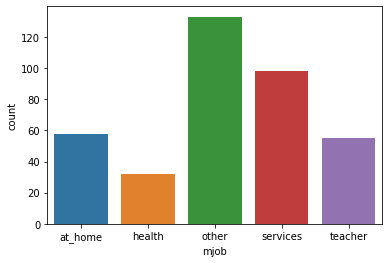

In [29]:
# mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба,
# 'at_home' - не работает, 'other' - другое)
# номинативный оценочный признак
static_columns(students.mjob)

In [30]:
# имеется 19 пропусков заменим их модой
students.mjob = students.mjob.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
students.replace({'mjob': {'nan': students['mjob'].mode()[0]}}, inplace=True)

display(students.mjob.value_counts(dropna=False))

other       152
services     98
at_home      58
teacher      55
health       32
Name: mjob, dtype: int64

Пропуски: 36


count       359
unique        5
top       other
freq        197
Name: fjob, dtype: object

other       197
services    102
teacher      29
at_home      16
health       15
Name: fjob, dtype: int64

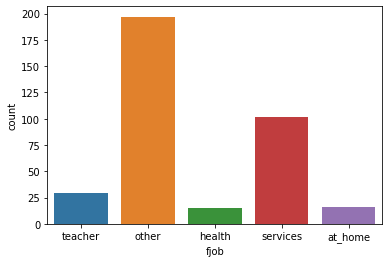

In [31]:
# fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба,
# 'at_home' - не работает, 'other' - другое)
# номинативный оценочный признак
static_columns(students.fjob)

In [32]:
# имеется 36 пропусков, их тоже заменим модой, к тому же это значение 'other', не будем создавать явного перевеса
students.fjob = students.fjob.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
students.replace({'fjob': {'nan': students['fjob'].mode()[0]}}, inplace=True)

display(students.fjob.value_counts(dropna=False))

other       233
services    102
teacher      29
at_home      16
health       15
Name: fjob, dtype: int64

Пропуски: 17


count        378
unique         4
top       course
freq         137
Name: reason, dtype: object

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

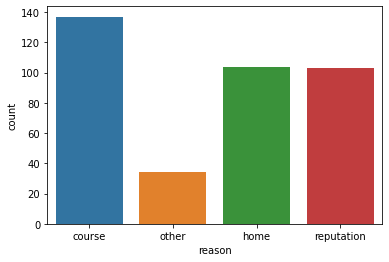

In [33]:
# reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы,
# 'course' - образовательная программа, 'other' - другое)
# номинативный оценочный признак
static_columns(students.reason)

In [34]:
# имеется 17 пропусков, заменим на значение 'other', будет более правдоподобно
students.reason = students.reason.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
students.loc[students['reason'] == 'nan', 'reason'] = 'other'

display(students.reason.value_counts(dropna=False))

course        137
home          104
reputation    103
other          51
Name: reason, dtype: int64

Пропуски: 31


count        364
unique         3
top       mother
freq         250
Name: guardian, dtype: object

mother    250
father     86
other      28
Name: guardian, dtype: int64

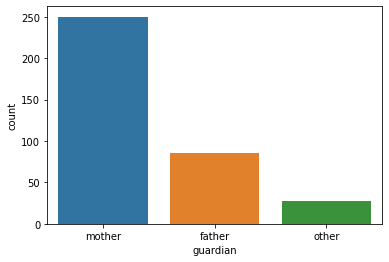

In [35]:
# guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
# номинативный оценочный признак
static_columns(students.guardian)

In [36]:
# имеется 31 пропуск, заменим на значение 'other', будет более правдоподобно
students.guardian = students.guardian.astype(
    str).apply(lambda x: None if x.strip() == '' else x)
students.loc[students['guardian'] == 'nan', 'guardian'] = 'other'

display(students.guardian.value_counts(dropna=False))

mother    250
father     86
other      59
Name: guardian, dtype: int64

Пропуски: 28


count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

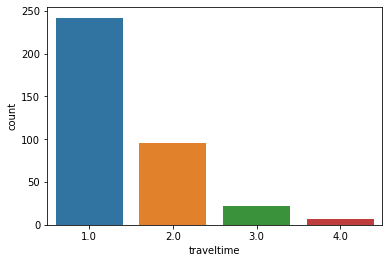

In [37]:
# traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
# номинативный оценочный признак
static_columns(students.traveltime)

In [38]:
# имеется 28 пропусков, заменим на медиану
students.traveltime = students.traveltime.astype(
    str).apply(lambda x: None if x.strip() == '' else x)
students.replace(
    {'traveltime': {'nan': students['traveltime'].median()}}, inplace=True)

display(students.traveltime.value_counts(dropna=False))

1.0    270
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

Пропуски: 7


count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

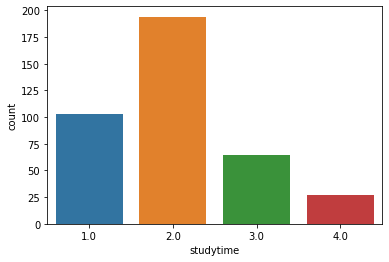

In [39]:
# studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
# номинативный оценочный признак
static_columns(students.studytime)

In [40]:
# имеется 7 пропусков, заменим их медианой
students.studytime = students.studytime.astype(
    str).apply(lambda x: None if x.strip() == '' else x)
students.replace(
    {'studytime': {'nan': students['studytime'].median()}}, inplace=True)

display(students.studytime.value_counts(dropna=False))

2.0    201
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

Пропуски: 22


count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

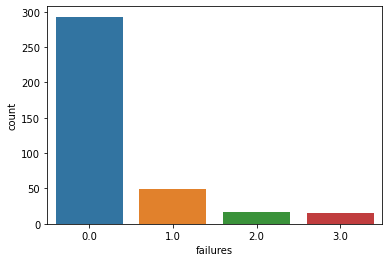

In [41]:
# failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
# номинативный оценочный признак
static_columns(students.failures)

In [42]:
# имеется 22 пропуска, напишем функцию рандомного подставления значений вместо пропусков
def nan_to_failures(column):
    nan_index_list = students[pd.isna(students[column])].index
    for index in nan_index_list:
        students.iat[index, students.columns.get_loc(column)] = np.random.choice([
            '0.0', '1.0', '2.0', '3.0'], 1)[0]


nan_to_failures('failures')
display(students.failures.value_counts(dropna=False))

0.0    297
1.0     54
3.0     23
2.0     21
Name: failures, dtype: int64

Пропуски: 9


count     386
unique      2
top        no
freq      335
Name: schoolsup, dtype: object

no     335
yes     51
Name: schoolsup, dtype: int64

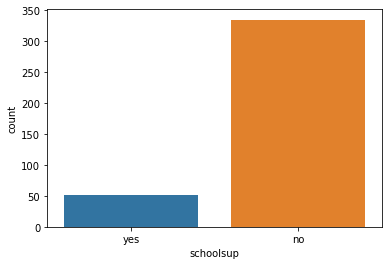

In [43]:
# schoolsup — дополнительная образовательная поддержка (yes или no)
# номинативный бинарный признак, т.к. всего два значения
static_columns(students.schoolsup)

In [44]:
# имеется 9 пропусков, применим функцию рандомного подставления значений вместо пропусков
nan_to_values('schoolsup')
display(students.schoolsup.value_counts(dropna=False))

no     339
yes     56
Name: schoolsup, dtype: int64

Пропуски: 39


count     356
unique      2
top       yes
freq      219
Name: famsup, dtype: object

yes    219
no     137
Name: famsup, dtype: int64

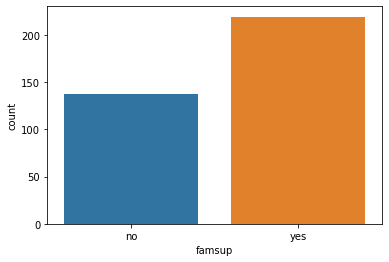

In [45]:
# famsup — семейная образовательная поддержка (yes или no)
# номинативный бинарный признак, т.к. всего два значения
static_columns(students.famsup)

In [46]:
# имеется 39 пропусков, применим функцию рандомного подставления значений
nan_to_values('famsup')
display(students.famsup.value_counts(dropna=False))

yes    237
no     158
Name: famsup, dtype: int64

Пропуски: 40


count     355
unique      2
top        no
freq      200
Name: paid, dtype: object

no     200
yes    155
Name: paid, dtype: int64

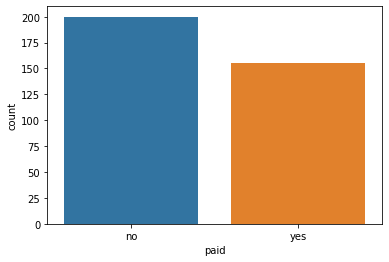

In [47]:
# paid — дополнительные платные занятия по математике (yes или no)
# номинативный бинарный признак, т.к. всего два значения
static_columns(students.paid)

In [48]:
# имеется 40 пропусков, применим функцию рандомного подставления значений
nan_to_values('paid')
display(students.paid.value_counts(dropna=False))

no     215
yes    180
Name: paid, dtype: int64

Пропуски: 14


count     381
unique      2
top       yes
freq      195
Name: activities, dtype: object

yes    195
no     186
Name: activities, dtype: int64

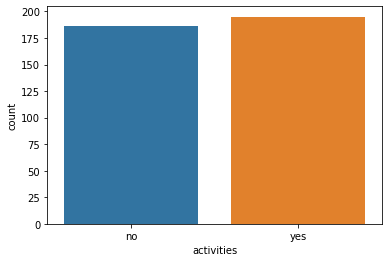

In [49]:
# activities — дополнительные внеучебные занятия (yes или no)
# номинативный бинарный признак, т.к. всего два значения
static_columns(students.activities)

In [50]:
# имеется 14 пропусков, применим функцию рандомного подставления значений
nan_to_values('activities')
display(students.activities.value_counts(dropna=False))

yes    204
no     191
Name: activities, dtype: int64

Пропуски: 16


count     379
unique      2
top       yes
freq      300
Name: nursery, dtype: object

yes    300
no      79
Name: nursery, dtype: int64

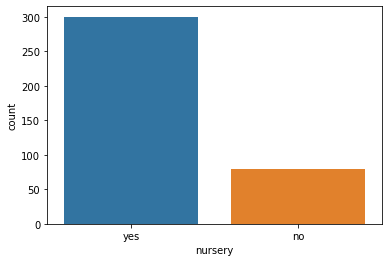

In [51]:
# nursery — посещал детский сад (yes или no)
# номинативный бинарный признак, т.к. всего два значения
static_columns(students.nursery)

In [52]:
# имеется 16 пропусков, применим функцию рандомного подставления значений
nan_to_values('nursery')
display(students.nursery.value_counts(dropna=False))

yes    305
no      90
Name: nursery, dtype: int64

Пропуски: 20


count     375
unique      2
top       yes
freq      356
Name: higher, dtype: object

yes    356
no      19
Name: higher, dtype: int64

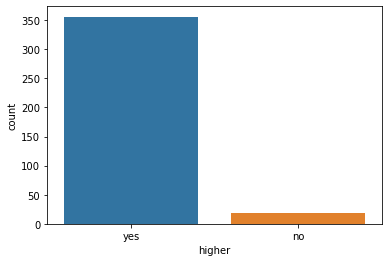

In [53]:
# higher — хочет получить высшее образование (yes или no)
# номинативный бинарный признак, т.к. всего два значения
static_columns(students.higher)

In [54]:
# имеется 20 пропусков, применим функцию рандомного подставления значений
nan_to_values('higher')
display(students.higher.value_counts(dropna=False))

yes    363
no      32
Name: higher, dtype: int64

Пропуски: 34


count     361
unique      2
top       yes
freq      305
Name: internet, dtype: object

yes    305
no      56
Name: internet, dtype: int64

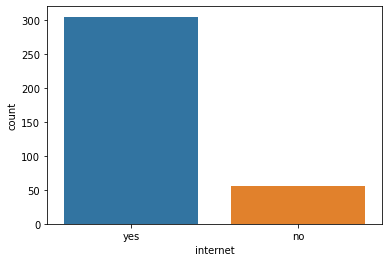

In [55]:
# internet — наличие интернета дома (yes или no)
# номинативный бинарный признак, т.к. всего два значения
static_columns(students.internet)

In [56]:
# имеется 34 пропуска, применим функцию рандомного подставления значений
nan_to_values('internet')
display(students.internet.value_counts(dropna=False))

yes    322
no      73
Name: internet, dtype: int64

Пропуски: 31


count     364
unique      2
top        no
freq      240
Name: romantic, dtype: object

no     240
yes    124
Name: romantic, dtype: int64

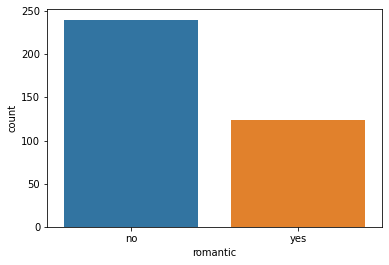

In [57]:
# romantic — в романтических отношениях (yes или no)
# номинативный бинарный признак, т.к. всего два значения
static_columns(students.romantic)

In [58]:
# имеется 31 пропуск, применим функцию рандомного подставления значений
nan_to_values('romantic')
display(students.romantic.value_counts(dropna=False))

no     254
yes    141
Name: romantic, dtype: int64

Пропуски: 27


count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

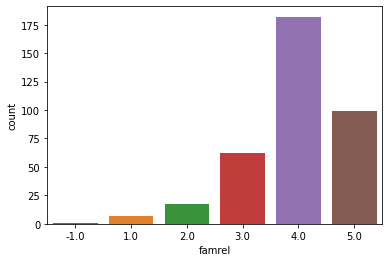

In [59]:
# famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
# номинативный оценочный признак
static_columns(students.famrel)

In [60]:
# имеется 27 пропусков и один выброс, скорее всего лишний минус
students.loc[students.famrel == -1, 'famrel'] = 1
# применим функцию рандомного подставления значений
nan_to_estimation('famrel')
display(students.famrel.value_counts(dropna=False))

4.0    188
5.0    106
3.0     67
2.0     21
1.0     13
Name: famrel, dtype: int64

Пропуски: 11


count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

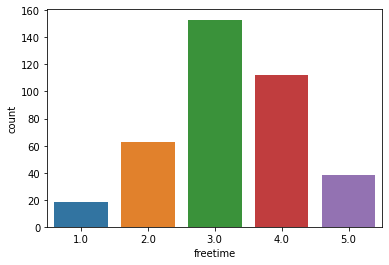

In [61]:
# freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
# номинативный оценочный признак
static_columns(students.freetime)

In [62]:
# имеется 11 пропусков, применим функцию рандомного подставления значений
nan_to_estimation('freetime')
display(students.freetime.value_counts(dropna=False))

3.0    155
4.0    113
2.0     66
5.0     39
1.0     22
Name: freetime, dtype: int64

Пропуски: 8


count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

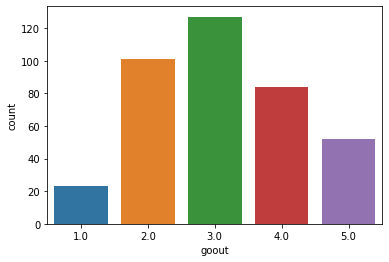

In [63]:
# goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
# номинативный оценочный признак
static_columns(students.goout)

In [64]:
# имеется 8 пропусков, применим функцию рандомного подставления значений
nan_to_estimation('goout')
display(students.goout.value_counts(dropna=False))

3.0    128
2.0    102
4.0     86
5.0     55
1.0     24
Name: goout, dtype: int64

Пропуски: 15


count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

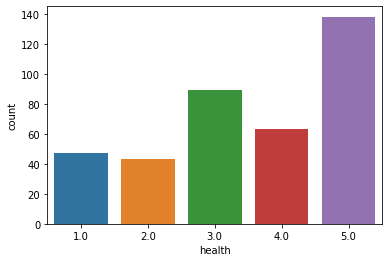

In [65]:
# health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
# номинативный оценочный признак
static_columns(students.health)

In [66]:
# имеется 15 пропусков, применим функцию рандомного подставления значений
nan_to_estimation('health')
display(students.health.value_counts(dropna=False))

5.0    143
3.0     91
4.0     65
1.0     51
2.0     45
Name: health, dtype: int64

Пропуски: 12


count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

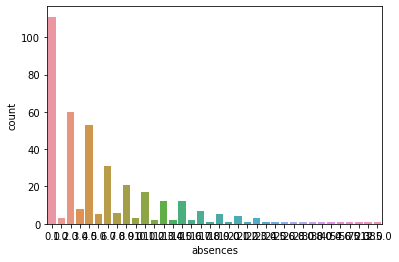

In [67]:
# absences — количество пропущенных занятий
# Числовой признак
static_columns(students.absences)

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


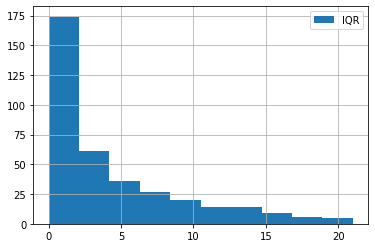

In [68]:
# Проверим на выбросы
median = students['absences'].median()
perc25 = students['absences'].quantile(0.25)
perc75 = students['absences'].quantile(0.75)
IQR = perc75 - perc25
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
students['absences'].loc[students['absences'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=10, range=(0, 21),
                                                                                                label='IQR')
plt.legend()

In [69]:
# Заполним пропуски часто встречающемся значением

students.absences.fillna(
    students.absences.value_counts().idxmax(), inplace=True)

# Чтобы не удалять строки с выбросами - приведем их к значению 100, т.к. мы не знаем сколько реально было занятий,
# но 2 значения после 100 сильно отдаленны от остальных

students['absences'] = students['absences'].apply(
    lambda x: x if x < 100 else 100)

display(students.absences.value_counts(dropna=False))

0.0      123
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
1.0        3
9.0        3
15.0       2
13.0       2
11.0       2
100.0      2
54.0       1
25.0       1
17.0       1
26.0       1
56.0       1
24.0       1
23.0       1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
28.0       1
Name: absences, dtype: int64

Пропуски: 6


count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

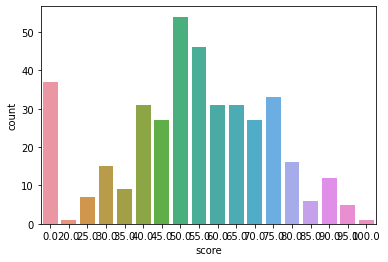

In [70]:
# score - баллы по госэкзамену по математике
# Наша основная целевая переменная
static_columns(students.score)

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


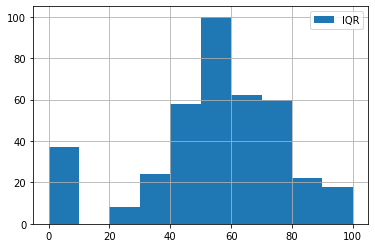

In [71]:
# Проверим выбросы
median = students.score.median()
IQR = students.score.quantile(0.75) - students.score.quantile(0.25)
perc25 = students.score.quantile(0.25)
perc75 = students.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


students_score_plot = students.score[students.score.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
students_score_plot.hist(bins=10, label='IQR')
plt.legend()

In [72]:
# Выбросов нет, зато есть 6 пропусков, по-моему мнению их лучше удалить,
# т.к. это наша основная переменная от которой мы отталкиваемся, потеря несущественная,
# зато не внесём дополнительную погрешность
students['score'].replace('', np.nan, inplace=True)
students.dropna(subset=['score'], inplace=True)
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      389 non-null    object 
 1   sex         389 non-null    object 
 2   age         389 non-null    int64  
 3   address     389 non-null    object 
 4   famsize     389 non-null    object 
 5   pstatus     389 non-null    object 
 6   medu        389 non-null    float64
 7   fedu        389 non-null    float64
 8   mjob        389 non-null    object 
 9   fjob        389 non-null    object 
 10  reason      389 non-null    object 
 11  guardian    389 non-null    object 
 12  traveltime  389 non-null    float64
 13  studytime   389 non-null    float64
 14  failures    389 non-null    float64
 15  schoolsup   389 non-null    object 
 16  famsup      389 non-null    object 
 17  paid        389 non-null    object 
 18  activities  389 non-null    object 
 19  nursery     389 non-null    o

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.090861,-0.147231,0.076013,-0.018019,0.164554,0.018079,0.007634,0.122849,-0.049998,0.175995,-0.155726
medu,-0.090861,1.000000,0.801584,-0.129261,0.019203,-0.159466,0.009493,0.041020,0.084078,0.030278,0.068345,0.164674
fedu,-0.147231,0.801584,1.000000,-0.145694,-0.007589,-0.212408,-0.029322,0.012446,0.072889,0.014896,0.052077,0.136628
traveltime,0.076013,-0.129261,-0.145694,1.000000,-0.098226,0.049811,-0.047943,-0.037223,0.041593,-0.053142,-0.024101,-0.056535
studytime,-0.018019,0.019203,-0.007589,-0.098226,1.000000,-0.136146,0.042874,-0.105748,-0.047585,-0.059069,-0.049134,0.114295
failures,0.164554,-0.159466,-0.212408,0.049811,-0.136146,1.000000,0.009552,0.057576,0.094426,0.049003,0.096887,-0.264792
famrel,0.018079,0.009493,-0.029322,-0.047943,0.042874,0.009552,1.000000,0.162264,0.081219,0.033038,-0.076597,0.073367
freetime,0.007634,0.041020,0.012446,-0.037223,-0.105748,0.057576,0.162264,1.000000,0.297488,0.058378,-0.032306,0.018487
goout,0.122849,0.084078,0.072889,0.041593,-0.047585,0.094426,0.081219,0.297488,1.000000,-0.014700,-0.008647,-0.113003
health,-0.049998,0.030278,0.014896,-0.053142,-0.059069,0.049003,0.033038,0.058378,-0.014700,1.000000,-0.019337,-0.076969


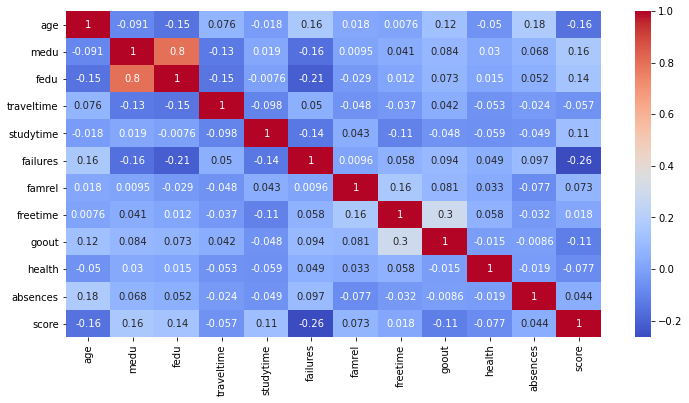

In [73]:
# Мы изучили все признаки, убрали либо заменили пропуски, проработали выбросы
# Корреляционный анализ
# Выясним, какие столбцы коррелируют с оценкой
# Используем для наглядности матрицу корреляций и тепловую карту:

fig = plt.figure(figsize=(12, 6))
sns.heatmap(students.corr(), annot=True, cmap='coolwarm')

students.corr()

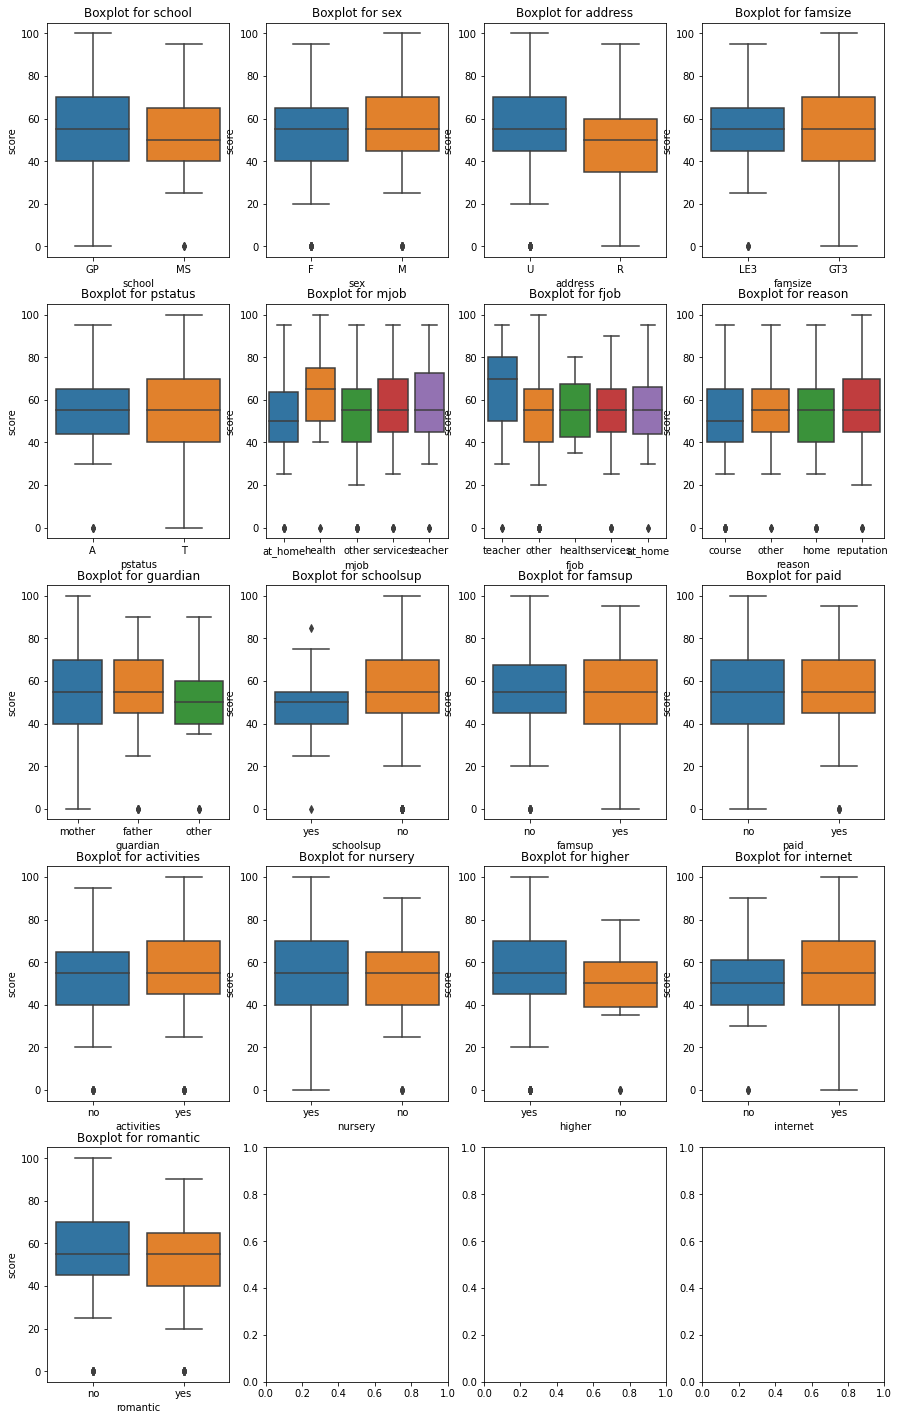

In [74]:
# Есть небольшая корреляция между признаками образования матери и отца, на которую мы слегка сами повлияли,
# но с оценкой корреляция разная, оставляем оба признака
# Анализ номинативных признаков
# Построим boxplot для каждого номинативного признака

def get_all_boxplot(ncol, columns_list, column_y):
    if len(columns_list) % ncol == 0:
        nrow = len(columns_list)//ncol
    else:
        nrow = len(columns_list)//ncol+1
    if 15//ncol >= 5:
        size_x = ncol*4.5
    else:
        size_x = 15
    size_y = nrow*5
    fig, axes = plt.subplots(nrow, ncol, figsize=(size_x, size_y))
    for i in range(nrow):  # проходим по строкам области рисования
        for j in range(ncol):  # проходим по столбцам области рисования
            if len(columns_list) == 0:  # если характеристики в списке закончились - прекращаем циклы
                break
            else:
                # удаляет первый элемент из списка и возвращает его значение
                column_x = columns_list.pop(0)
                if nrow == 1:
                    sns.boxplot(x=column_x, y=column_y,
                                data=students, ax=axes[j])
                    axes[j].set_title('Boxplot for ' + column_x)
                elif ncol == 1:
                    sns.boxplot(x=column_x, y=column_y,
                                data=students, ax=axes[i])
                    axes[i].set_title('Boxplot for ' + column_x)
                else:
                    sns.boxplot(x=column_x, y=column_y,
                                data=students, ax=axes[i, j])
                    axes[i, j].set_title('Boxplot for ' + column_x)


# список характеристик
columns_list = list(students.select_dtypes(exclude='number').columns)

get_all_boxplot(4, columns_list, 'score')

In [75]:
#  Проверим есть ли статистическая разница в распределении оценок по номинативным признакам,
# с помощью теста Стьюдента.

def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'],
                     students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob',
            'fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
            'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [76]:
# Тест показал нам 4 значимых признака
# Удалим статистически малозначимые признаки
students.drop(columns=['school', 'schoolsup', 'internet', 'sex', 'famsize', 'pstatus', 'fjob',
                       'reason', 'guardian', 'famsup', 'paid',
                       'activities', 'nursery'], inplace=True)

In [77]:
# Вывод. Удалили колонку "studytime, granular", т.к она обратно скоррелирована с колонкой "studytime".
# Так же удалили строки содержащие пустые значения по нашему целевому признаку Score
# Большинство пустых значений было рандомного заменено на значения из выборки для поддержания реалистичности
# Проведя анализ у нас осталось 15 признаков, так или иначе влияющих на показатель оценки по математике (Score).
# Эти показатели мы будем использовать для построения первоначальной модели

students_for_model = students.loc[:, ['age', 'absences', 'address', 'medu', 'fedu', 'mjob', 'failures',
                                      'traveltime', 'studytime', 'higher', 'romantic', 'famrel', 'freetime', 'goout', 'health']]
students_for_model.head()

,age,absences,address,medu,fedu,mjob,failures,traveltime,studytime,higher,romantic,famrel,freetime,goout,health
0,18,6.0,U,4.0,4.0,at_home,0.0,2.0,2.0,yes,no,4.0,3.0,4.0,3.0
1,17,4.0,U,1.0,1.0,at_home,0.0,1.0,2.0,yes,no,5.0,3.0,3.0,3.0
2,15,10.0,U,1.0,1.0,at_home,3.0,1.0,2.0,yes,no,4.0,3.0,2.0,3.0
3,15,2.0,U,2.0,2.0,health,0.0,1.0,3.0,yes,yes,3.0,2.0,2.0,5.0
4,16,4.0,U,3.0,3.0,other,0.0,1.0,2.0,yes,no,4.0,3.0,2.0,5.0
